# Stage 5 submission: Titanic survival analysis
I chose titanic dataset as my project

# Interested questions
For Titanic dataset, what I am interested are the factors made people more likely to survive. They are listed as following: <br>
(1) How **gender influences** the number of survivals;<br>
(2) How **fare influences** the number of survivals;<br>
(3) How **passenger class** influences the number of survivals;<br>
(4) How **cabin influences** the number of survivals.<br>
(5) How **family influences** the number of survivals.

In [1]:
# Import modules 
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load titanic csv file 'titanic_data.csv'
titanic_df = pd.read_csv('/Users/Scott/Desktop/Udacity_programming/submission/stage_5_submission/titanic_data.csv')

# Add one column filled with number '1', to count person numbers.
titanic_df['Num_count']=1

#file check
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Num_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [2]:
#Data check
titanic_df.info()

#some of the information is incompleted as shown below, such as 'Age' and 'Cabin"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Num_count      891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


It is noticed 'Age', 'Cabin' and 'Embarked' has fewer information than others

In [3]:
def survived_vs_key(key):
    '''Define a function, that summarize the survival vs a key in Dataframe 'titanic_df'.
       The format of the return of this function is like
       
            survived
       key     
       xx1     num1
       xx2     num2
        .       .
        .       .
        .       .
       
       '''
    titanic_df_survive_vs_key = titanic_df[['Survived',key,'Num_count']].groupby(['Survived',key]).sum()
    survived_vs_key = titanic_df_survive_vs_key.loc[1]
    survived_vs_key.columns = ['Survived']
    return survived_vs_key


def died_vs_key(key):
    '''Define a function, that summarize the died vs a key in Dataframe 'titanic_df'.
       The format of the return of this function is like
       
               died
       key     
       xx1     num1
       xx2     num2
        .       .
        .       .
        .       .
       
       '''    
    titanic_df_died_vs_key = titanic_df[['Survived',key,'Num_count']].groupby(['Survived',key]).sum()
    died_vs_key = titanic_df_died_vs_key.loc[0]
    died_vs_key.columns = ['Died']
    return died_vs_key

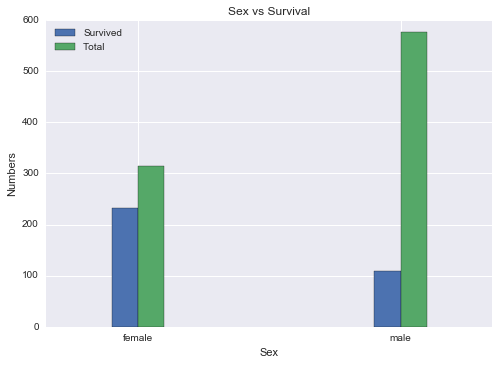

In [4]:
#How gender influences the number of survivals

# Survived vs sex
survived_sex = survived_vs_key('Sex')

# Find total number by gender
total_sex = titanic_df[['Sex','Num_count']].groupby('Sex').sum()
# Rename 'Num_count' colunm with 'Total'
total_sex.columns = ['Total']

# Add total_df to survival_df
survival_vs_sex_ratio = total_sex.add(survived_sex, fill_value = 0)

#plot
survival_vs_sex_ratio.plot(kind = 'bar', width = 0.2, rot = 0)
plt.title('Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Numbers')

As we can see from figure 'Survival vs sex' figure above, the total number of male was twice the number of female. However the suvived male were much smaller than female. The female were evaccuated priored to male according to many refrences.

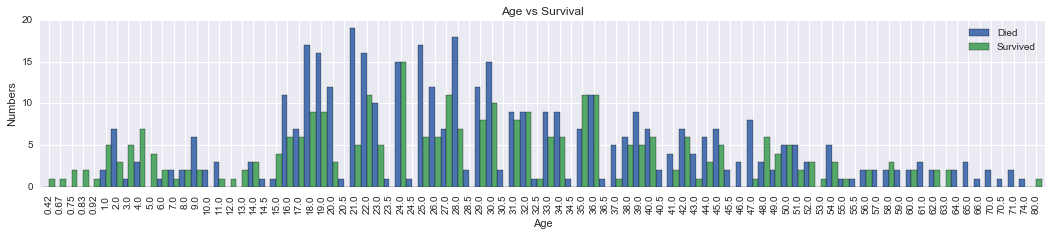

In [5]:
#How age influences the number of survivals

# Died vs age
died = died_vs_key('Age')
# Survived vs age
survived = survived_vs_key('Age')

# Add survived to died
age_vs_survival = died.add(survived, fill_value = 0)

#plot
age_vs_survival.plot(kind = 'bar', figsize=(18,3), width =1)
plt.title('Age vs Survival')
plt.ylabel('Numbers')

Above is the 'Age vs Survival' figure. Apparently chidren has higher survival ratio than adult because they were evacuated prior to adults. The ones among 20 to 30 seems sufferd much more death than other age groups.

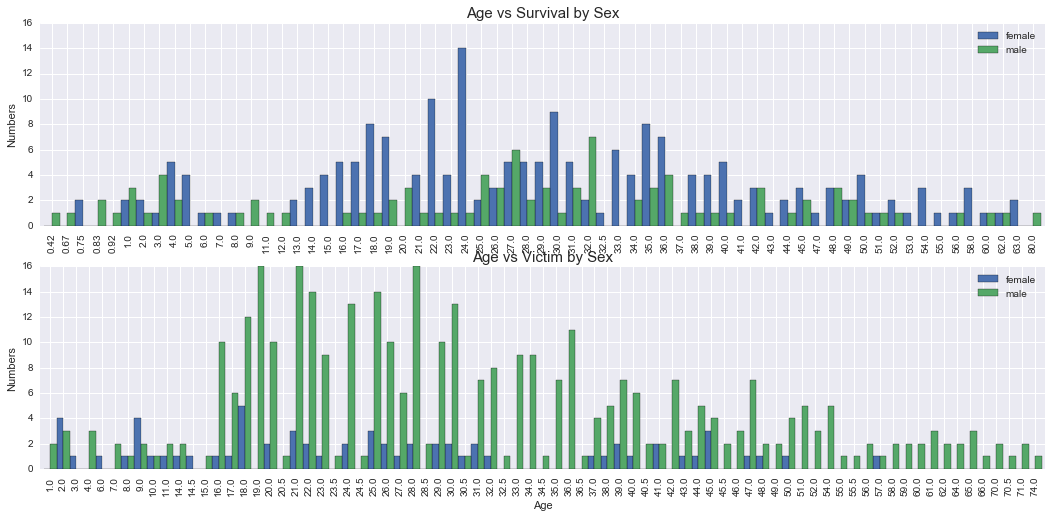

In [6]:
# Continue how age influences the number of survivals, but further explored by gender

# Find survived by age and gender
titanic_df_age_vs_sex_survived = titanic_df[["Age", "Survived",'Sex','Num_count']].groupby(['Survived','Sex','Age']).sum()
# Choose only died
died = titanic_df_age_vs_sex_survived.loc[0]
# Choose died female
died_female = died.loc['female']
# Rename 'Num_count' colunm with 'female'
died_female.columns = ['female']
# Choose died male
died_male = died.loc['male']
# Rename 'Num_count' colunm with 'male'
died_male.columns = ['male']

# Choose only survived
survived = titanic_df_age_vs_sex_survived.loc[1]
# Choose survived female
survived_female = survived.loc['female']
# Rename 'Num_count' colunm with 'female'
survived_female.columns = ['female']
# Choose survived male
survived_male = survived.loc['male']
# Rename 'Num_count' colunm with 'male'
survived_male.columns = ['male']

# Add survived male to survived female 
age_vs_survival = survived_female.add(survived_male, fill_value = 0)
# Add died male to died female 
age_vs_died = died_female.add(died_male, fill_value = 0)

# Plot
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(18,8))
age_vs_survival.plot(kind = 'bar', width =1,ax=axis1)
age_vs_died.plot(kind = 'bar', width =1,ax=axis2)

axis1.set_title('Age vs Survival by Sex', fontsize=15)
axis1.set_ylabel('Numbers')
axis1.set_xlabel('')
axis1.set_yticks(np.arange(0, 16.1,2))

axis2.set_title('Age vs Victim by Sex', fontsize=15)
axis2.set_ylabel('Numbers')

Another two figures show the survivals for female and male.<br>
In 'Age vs Survival', it is clear that almost for every age groups the female survived far more than male.<br>
In 'Age vs Victim', accordingly, the nealy every age the male victims are far more over females except children.<br>
Children and women were evacuated prior.

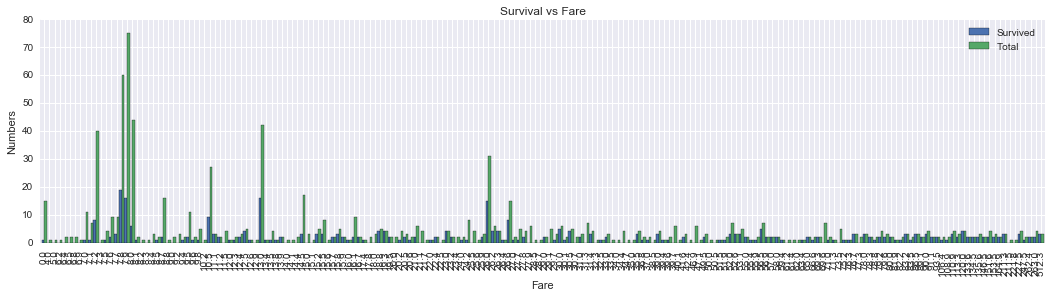

In [7]:
# How ticket fare influences the number of survivals

# Consider only one decimal
titanic_df = titanic_df.round({'Fare': 1})
# Survived vs fare
survived_fare = survived_vs_key('Fare')

# Find total number by fare
total_fare = titanic_df[['Fare','Num_count']].groupby('Fare').sum()
# Rename 'Num_count' colunm with 'Total'
total_fare.columns = ['Total']

# Add survived_fare to total_fare
survival_vs_fare_ratio = total_fare.add(survived_fare, fill_value = 0)
#plot
survival_vs_fare_ratio.plot(kind = 'bar', width = 1, figsize = (18,4))
plt.title('Survival vs Fare')
plt.xlabel('Fare')
plt.ylabel('Numbers')

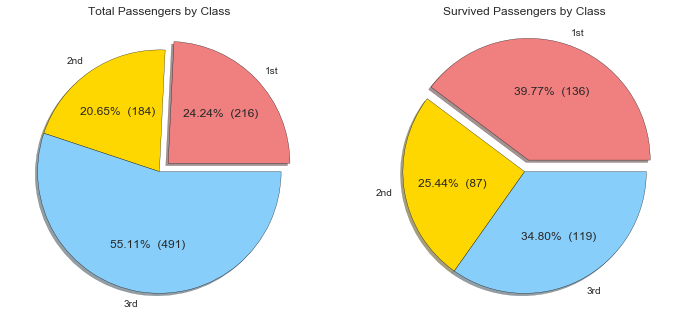

In [8]:
# How class influences the number of survivals

# Survived vs calss
survived_class = survived_vs_key('Pclass')

# Find total number by passenger class
total_class = titanic_df[['Pclass','Num_count']].groupby('Pclass').sum()
# Rename 'Num_count' colunm with 'Total'
total_class.columns = ['Total']

# Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
labels = '1st', '2nd', '3rd'
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0) 

def make_autopct(values):
    '''Define a function to show both percentage and number for each pie.
       '''
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p = pct,v = val)
    return my_autopct

ax1.pie(total_class['Total'], explode = explode, labels = labels, colors = colors,
       shadow = True, autopct = make_autopct(total_class['Total']), radius = 1)
ax1.set_aspect('equal')
ax1.set_title('Total Passengers by Class')

ax2.pie(survived_class['Survived'], explode = explode, labels = labels, colors = colors,
       shadow = True, autopct = make_autopct(survived_class['Survived']), radius = 1)
ax2.set_aspect('equal')
ax2.set_title('Survived Passengers by Class')

   As it is shown in the 'Survival vs Class' figure above, the people from 3rd class was much more than 1st and 2nd class. However the ratio of survival is much lower than 1st and 2nd. It is probobly because the 1st and 2nd class are closer to the upper deck, where the lifeboats were located.

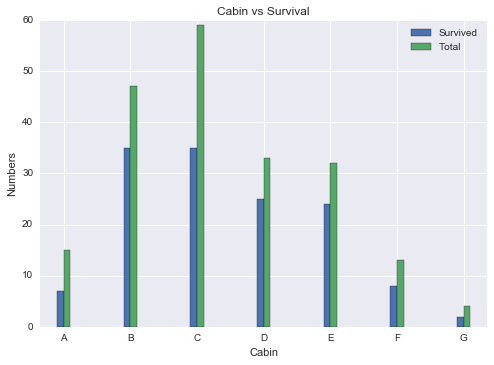

In [9]:
#How cabin influences the number of survivals

# By observing csv file, there is one cabin named T. 
# However according to the URL below, there is no such T cabin.
# Remove the T cabin.
titanic_df = titanic_df[titanic_df.Cabin != 'T']
# Survival vs cabin
survived_cabin = survived_vs_key('Cabin')

# Find total number by fare
total_cabin = titanic_df[['Cabin','Num_count']].groupby('Cabin').sum()
# Rename 'Num_count' colunm with 'Survived'
total_cabin.columns = ['Total']

# Add total_df to survival_df
survival_vs_cabin_ratio = total_cabin.add(survived_cabin, fill_value = 0)
# Fill NaN with 0.
survival_vs_cabin_ratio = survival_vs_cabin_ratio.fillna(0)
# Abstract the first letter of each cabin.
# Some passengers have more than one cabin. For this case still consider the first letter.
survival_vs_cabin_ratio.index = survival_vs_cabin_ratio.index.astype(str).str[0]
survival_vs_cabin_ratio['Cabin'] = survival_vs_cabin_ratio.index
survival_vs_cabin = survival_vs_cabin_ratio.groupby('Cabin').sum()

#plot
survival_vs_cabin.plot(kind = 'bar', width = 0.2, rot = 0)
plt.title('Cabin vs Survival')
plt.xlabel('Cabin')
plt.ylabel('Numbers')

   A figure of cabin location for each class can be seen from https://upload.wikimedia.org/wikipedia/commons/8/84/Titanic_cutaway_diagram.png, and https://www.scmp.com/sites/default/files/2014/11/06/titanic.jpg.<br>
   1st Class: All of A, B, C and half D canis;<br>
   2nd Class: Half F;<br>
   3rd Class: Half D and Half F.<br>
   Since the accident happend at 11：40 pm, we can assume that most of the passengers were resting at their room. <br>
   From the figure above, for each cabin, the survival propotion is almost the same and at a relatively high level. It is quite different from the 'Survival vs Class' figure showing that the only 24% of the 3rd class passengers suvived.
   

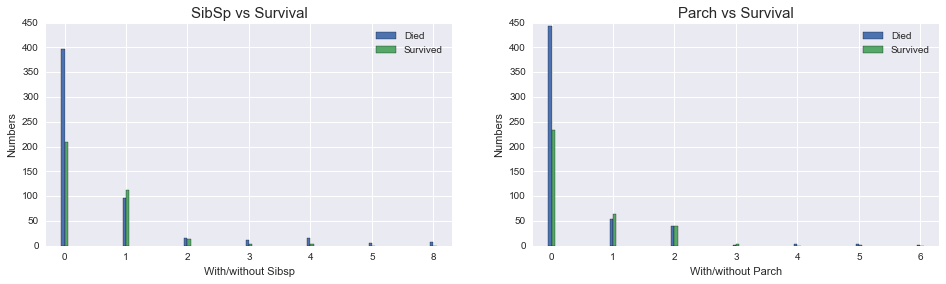

In [10]:
#How family influences the number of survivals

# Survived vs SibSp
SibSp_survived = survived_vs_key('SibSp')
# Died vs SibSp
SibSp_died = died_vs_key('SibSp')
# Add SibSp_died into SibSp_survived
survival_vs_SibSp = SibSp_survived.add(SibSp_died, fill_value = 0)

# Survived vs Parch
Parch_survived = survived_vs_key('Parch')
# Died vs Parch
Parch_died = died_vs_key('Parch')
# Add Parch_died into Parch_survived
survival_vs_Parch = Parch_survived.add(Parch_died, fill_value = 0)

#plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (16,4))
survival_vs_SibSp.plot(kind = 'bar', width = 0.1, ax = axis1, rot = 0)
survival_vs_Parch.plot(kind = 'bar', width = 0.1, ax = axis2, rot = 0)

axis1.set_title('SibSp vs Survival', fontsize=15)
axis1.set_ylabel('Numbers')
axis1.set_xlabel('With/without Sibsp')
axis1.set_yticks(np.arange(0, 451,50))

axis2.set_title('Parch vs Survival', fontsize=15)
axis2.set_ylabel('Numbers')
axis2.set_xlabel('With/without Parch')

For both figure above, those without families are more likely to survive.<br>
The more the family members are, the lower survival ratio, probably because they big family could not be evaccuated at the same time.

# Conclusions
## 1. Sex & age
Female passengers survived almost four times over male passengers in all, and women survived more than men almost in each age group. Children (under 15) also survived a lot than adults. The 'Women and Children first' rule was followed.
## 2. Fare
Passengers bought expensive tickets survived more than those who bought cheaper tickest, since the price related to class strongly.
## 3. Class
More than half of the passengers were from the 3rd class, but 1st and 2nd class passengers account for over 60% survival percentage because their rooms were closed to the liveboats.
## 4. Cabin
Due to the lack of cabin information(only 204 compares to other of 891), the survival percentage of each cabin are almost the same. Dealing with cabin information may lead to a bad conclusion.<br>
The complete cabin information for each passenger is preferred. The information about each passenger's location at the time of accident will be the best, although it may be difficult.
## 5. Family
Those with family members were more likely with lower survival percentage since they had to care about their families.